In [28]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [29]:
#don't run this part
%cd gdrive/My\ Drive/data

[Errno 2] No such file or directory: 'gdrive/My Drive/data'
/content/gdrive/My Drive/data


In [102]:
import tweepy
import json
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt

In [103]:
WorldPoetryDay = pd.read_csv('WorldPoetryDay.csv')
WorldPoetryDay = WorldPoetryDay.iloc[:1072,:]
WorldPoetryDay.head()

,Label,created_at,id,id_str,full_text,truncated,display_text_range,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,retweeted_status,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,1.0,Sun Mar 21 11:43:58 +0000 2021,1.373600e+18,1.373600e+18,RT @tcddublin: Brendan Kennelly was Professor ...,False,"[0, 140]","{'hashtags': [{'text': 'WorldPoetryDay', 'indi...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,NaN,"{'id': 950026288923856896, 'id_str': '95002628...",NaN,NaN,NaN,NaN,{'created_at': 'Sun Mar 21 09:24:01 +0000 2021...,FALSE,19,0,FALSE,FALSE,en,NaN,NaN,NaN,NaN
1,1.0,Sun Mar 21 11:43:57 +0000 2021,1.373600e+18,1.373600e+18,RT @mariecurieuk: Taken from the beautiful poe...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,NaN,NaN,NaN,NaN,"{'id': 1236777923065139201, 'id_str': '1236777...",NaN,NaN,NaN,NaN,{'created_at': 'Sun Mar 21 11:08:01 +0000 2021...,FALSE,2,0,FALSE,FALSE,en,NaN,NaN,NaN,NaN
2,1.0,Sun Mar 21 11:43:55 +0000 2021,1.373600e+18,1.373600e+18,"""This is an edge / where the pen runs dumb.""\n...",False,"[0, 86]","{'hashtags': [{'text': 'WorldPoetryDay', 'indi...","{'media': [{'id': 1373601257844318208, 'id_str...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,NaN,"{'id': 702755917650128897, 'id_str': '70275591...",NaN,NaN,NaN,NaN,FALSE,0,0,FALSE,FALSE,FALSE,en,NaN,NaN,NaN
3,1.0,Sun Mar 21 11:43:54 +0000 2021,1.373600e+18,1.373600e+18,RT @ClarenceHouse: Happy #WorldPoetryDay!\n\nL...,False,"[0, 140]","{'hashtags': [{'text': 'WorldPoetryDay', 'indi...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,NaN,"{'id': 2479233234, 'id_str': '2479233234', 'na...",NaN,NaN,NaN,NaN,{'created_at': 'Sun Mar 21 09:22:33 +0000 2021...,FALSE,102,0,FALSE,FALSE,en,NaN,NaN,NaN,NaN
4,1.0,Sun Mar 21 11:43:53 +0000 2021,1.373600e+18,1.373600e+18,"RT @UN_Women: The span of my hips, \nThe strid...",False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,NaN,NaN,"{'id': 1361696916850028547, 'id_str': '1361696...",NaN,NaN,NaN,NaN,{'created_at': 'Sun Mar 21 10:35:02 +0000 2021...,FALSE,149,0,FALSE,FALSE,en,NaN,NaN,NaN,NaN


In [128]:
WorldPoetryDayNp = WorldPoetryDay.to_numpy()
print(WorldPoetryDay.shape)
# X, y = WorldPoetryDayNp[:,[2,4,15,22,23]],WorldPoetryDayNp[:,0]
X, y = WorldPoetryDayNp[:,4],WorldPoetryDayNp[:,0]
print(X.shape)
print(y.shape)
Xn = []
yn = []
for i in range(len(X)):
  # print(y[i])
  # print(int(y[i]))
  if(int(y[i]) >= 2):
    continue
  else:
    Xn.append(X[i])
    yn.append(y[i])
  # break
X = np.array(Xn); y = np.array(yn)
print(X.shape)
print(y.shape)
print(X[:5])
print(y[:5])

# print(y.unique())

(1072, 31)
(1072,)
(1072,)
(1070,)
(1070,)
['RT @tcddublin: Brendan Kennelly was Professor of Modern Literature in Trinity and is one of Ireland’s greatest poets. On #WorldPoetryDay ch…'
 "RT @mariecurieuk: Taken from the beautiful poem 'Do Not Stand at My Grave and Weep'.\n\nRead six uplifting poems about death that celebrate l…"
 '"This is an edge / where the pen runs dumb."\n\nReading Moya Cannon on #WorldPoetryDay 🍃 https://t.co/wWMdfrMa41'
 'RT @ClarenceHouse: Happy #WorldPoetryDay!\n\nListen to The Prince of Wales recite Tintern Abbey by William Wordsworth.\n\nThis reading was orig…'
 "RT @UN_Women: The span of my hips, \nThe stride of my step, \nThe curl of my lips. \nI'm a woman\nPhenomenally.\n\n- @DrMayaAngelou, whose words…"]
[1. 1. 1. 1. 1.]


1.0    1008
0.0      62
Name: 0, dtype: int64


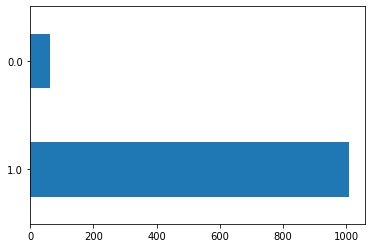

In [129]:
#plotting class frequency
label = pd.DataFrame(y)
classFreq = label[0].value_counts()
print(classFreq)
classFreq.plot.barh()
plt.show()

In [130]:
#down samplling
length = len(X)
Xn = []; yn = []
for i in range(length):
  if(y[i] == 0):
    yn.append(y[i])
    Xn.append(X[i])
for i in range(4*len(Xn)+20):
  if(y[i] == 1):
    yn.append(y[i])
    Xn.append(X[i])
X = np.array(Xn); y = np.array(yn)
print(y)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


1.0    244
0.0     62
Name: 0, dtype: int64


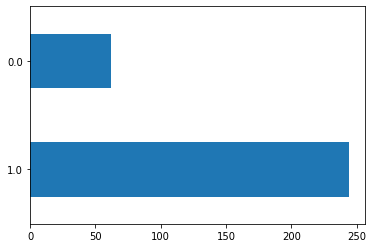

In [131]:
#plotting class frequency after down samplling
label = pd.DataFrame(y)
classFreq = label[0].value_counts()
print(classFreq)
classFreq.plot.barh()
plt.show()

In [132]:
import glob
import nltk
import string
import numpy as np
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
def preprocessing(doc):
  puncd = {  }
  for i in string.punctuation:
    puncd[i] = ' '
  doc = doc.translate(str.maketrans(puncd))                     #replacing the punctuation marks with white spaces. 
  doc = doc.strip()                                             #removing the extra white space characters. 
  doc = doc.lower()                                             #making the string to lower case letters. 

  tokens = word_tokenize(doc)                                         #tokenise the words to a list. 
  tokens_NoStop = [i for i in tokens if i not in stop_words]                #removing the stop words from the tokenised list. 
  lemmatizer=WordNetLemmatizer()
  lemmedWordtext = []
  for i in range(len(tokens_NoStop)):
    lemmedWordtext.append(lemmatizer.lemmatize(tokens_NoStop[i]))           #appending the lemmatized word in the list
  return lemmedWordtext
Xnew = []
for i in range(len(X)):
  Xnew.append(preprocessing(X[i]))

print(Xnew[:5])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[['rt', 'enjoyingnorfolk', '’', 'resist', 'coastal', 'vibe', 'worldpoetryday', 'especially', 'seeing', 'season', 'one', 'norfolk', 'amp', 'good', 'podcas…'], ['rt', 'evelyncare', 'worldpoetryday', 'worldpoetryday2021', 'flyqueensanitrynapkins', 'shine', 'period', 'nevergiveup', 'menstruation', 'motivation', 'progr…'], ['rt', 'abdulnassir21', 'abdulatif', 'abdalla', '’', 'kenya', 'twendapi', 'recipe', 'intellectual', 'discourse', 'many', 'university', 'based', 'europe', 'amp', 'h…'], ['rt', 'un', 'woman', 'work', 'equip', 'next', 'generation', 'woman', 'outdo', 'u', 'every', 'field', 'legacy', 'leave', 'behind', '𝘱𝘳𝘰𝘨𝘳𝘦𝘴𝘴…'], ['delving', 'back', 's

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify = y, random_state=37)
print(X_train.shape)
print(X_test.shape)

(205,)
(101,)


In [136]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pickle
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(tokenizer = preprocessing)#,stop_words=stop_words
X_trainT = vectorizer.fit_transform(X_train)
features = vectorizer.get_feature_names()
print("No of features after vectorizing X_train:", len(features))
X_testT  = vectorizer.transform(X_test)
print("shape of X_trainT:", X_trainT.shape)

from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB(class_prior = [0.999, 0.001])
y_train = y_train.astype('i')
print(y_train.dtype)
model.fit(X_trainT, y_train)

#saving model then reading it again
pickle.dump(model, open('baseLineModel.sav', 'wb'))
model = pickle.load(open('baseLineModel.sav', 'rb'))

y_pred = model.predict(X_testT)
print("shape of y pred",y_pred.shape)
print("shape of y test",y_test.shape)
print(y_pred[:100])
print(y_test[:100])
y_test = y_test.astype('i')
print("Accuracy: ",accuracy_score(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test,y_pred))
# X_trainT

No of features after vectorizing X_train: 1228
shape of X_trainT: (205, 1228)
int32
shape of y pred (101,)
shape of y test (101,)
[1 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0
 1 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1]
[1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1]
Accuracy:  0.5841584158415841
[[20  0]
 [42 39]]
              precision    recall  f1-score   support

           0       0.32      1.00      0.49        20
           1       1.00      0.48      0.65        81

    accuracy                           0.58       101
   macro avg       0.66      0.74      0.57       101
weighted avg       0.87      0.58      0.62       101



In [ ]:
# from sklearn.linear_model import LogisticRegression
# clf = LogisticRegression(random_state=0).fit(X, y)
# clf.predict(X[:2, :])